# Histograms, Binnings, and Density

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

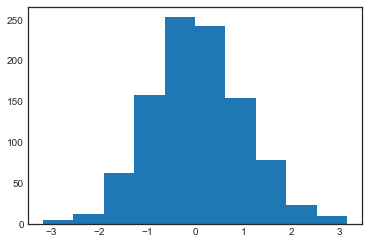

In [2]:
plt.hist(data);

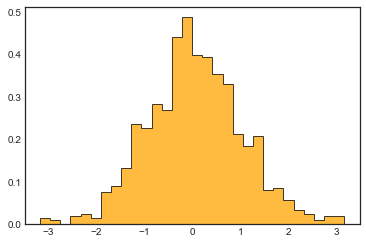

In [11]:
plt.hist(data, bins=30, density=True, alpha=.75, histtype='stepfilled', color='orange', edgecolor='k');

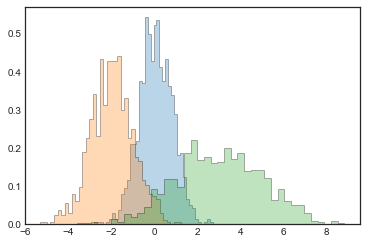

In [14]:
x1 = np.random.normal(0,.8,1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

# The keyword arguments can be passed to the hist method as a dictionary with a '**' prefix
kwargs= dict(histtype='stepfilled', alpha=.3, density=True, bins=40, edgecolor='k')

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [15]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 17 221 495 233  34]


## Two Dimensional Histograms and Binnings

In [85]:
mean = [1, 0]
cov = [[1, 1], [1, 4]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

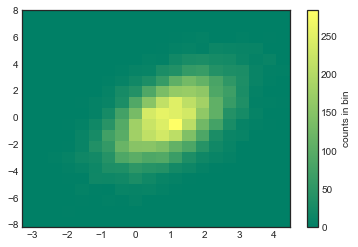

In [90]:
plt.hist2d(x, y, bins=20, cmap='summer')
cb = plt.colorbar()
cb.set_label('counts in bin')

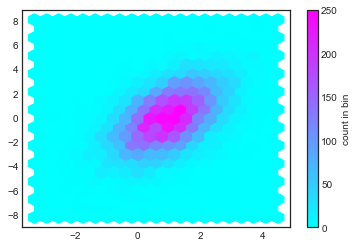

In [91]:
# Hexagonal Bins

plt.hexbin(x, y, gridsize=20, cmap='cool')
cb = plt.colorbar(label='count in bin')

## Kernel Density Estimation

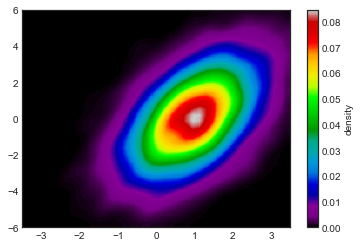

In [93]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regualr grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='nipy_spectral',
           interpolation='hamming')
cb = plt.colorbar()
cb.set_label("density")